In [2]:
import numpy as np
import jieba
import jieba.analyse
import jieba.posseg as pseg
import codecs,sys
import re
import pickle
from collections import Counter
import tqdm
import os,logging
from pathlib import Path
import gensim
import pandas as pd
from gensim.models import word2vec
import wheel

In [2]:
vector = np.array([1112,456,1231241])

In [3]:
vector

array([   1112,     456, 1231241])

In [4]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [5]:
softmax(vector)

array([0., 0., 1.])

In [6]:
zh_wiki = Path("F:\wiki20190720\wiki20190720\extracted\AA")

In [7]:
zh_wiki

WindowsPath('F:/wiki20190720/wiki20190720/extracted/AA')

In [8]:
word_stop_set=set()
#加载停用词表
with open(r'F:\wiki20190720\stopwords\stop_words_zh.txt',encoding='utf-8')as f:
    for word in f.readlines():
        word_stop_set.add(word.strip('\n'))     

In [9]:
def main():
    logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
    sentences = word2vec.LineSentence(r"F:\wiki20190720\wiki20190720\extracted\AA\wiki_corpus")  # 注意替换成你的路径
    model = word2vec.Word2Vec(sentences, size=100,window=5, min_count=3, workers=4)  # size默认是100-300，根据你的语料大小进行增加，效果看你的需求
    # 保存模型
    model.save(r"F:\wiki20190720\wiki20190720\extracted\AA\wiki_corpus1.model")

In [10]:
main()

2019-08-22 17:28:12,209:INFO:collecting all words and their counts
2019-08-22 17:28:12,214:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-22 17:28:18,289:INFO:PROGRESS: at sentence #10000, processed 7398658 words, keeping 375090 word types
2019-08-22 17:28:23,012:INFO:PROGRESS: at sentence #20000, processed 13371020 words, keeping 538012 word types
2019-08-22 17:28:26,877:INFO:PROGRESS: at sentence #30000, processed 18258738 words, keeping 662260 word types
2019-08-22 17:28:30,207:INFO:PROGRESS: at sentence #40000, processed 22736422 words, keeping 760728 word types
2019-08-22 17:28:33,029:INFO:PROGRESS: at sentence #50000, processed 26444757 words, keeping 834253 word types
2019-08-22 17:28:35,868:INFO:PROGRESS: at sentence #60000, processed 30065033 words, keeping 906876 word types
2019-08-22 17:28:38,483:INFO:PROGRESS: at sentence #70000, processed 33454631 words, keeping 972181 word types
2019-08-22 17:28:40,335:INFO:PROGRESS: at sentence #80000, pro

KeyboardInterrupt: 

In [3]:
model = gensim.models.Word2Vec.load("F:\wiki20190720\wiki20190720\extracted\AA\wiki_corpus.model")

C:\Users\wu\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [4]:
model.wv['数学']

array([ 0.09826279, -2.7937508 , -0.85407025, -2.9335756 , -0.9636633 ,
        1.3912896 , -0.8599071 ,  0.07912169, -2.5662136 ,  0.53414583,
        2.6562018 ,  0.24555093,  0.13992438, -1.4662162 ,  0.84464985,
       -0.05864387,  0.5154106 , -1.3308983 , -0.8839637 , -0.08743703,
       -1.1872573 , -2.6326697 ,  0.07289577,  1.8259982 ,  2.2249913 ,
        1.0636207 ,  0.318003  ,  2.5754213 ,  1.2382427 ,  1.3600032 ,
       -1.1044977 ,  1.2689462 ,  0.65208703,  2.4145956 , -0.9977577 ,
        0.05644133,  0.6273336 , -1.8348471 ,  1.5962925 , -0.5805268 ,
        0.9861224 ,  0.8627091 ,  2.0038807 , -0.56725055,  1.385439  ,
        0.88484865,  0.5333464 , -0.57347274, -1.5362579 ,  0.70897484,
       -1.361376  ,  0.2940211 ,  0.5107131 ,  0.6367022 , -0.24393837,
       -1.283144  , -1.0179123 , -2.1010344 ,  0.5471953 ,  0.8752358 ,
        0.83988947, -0.72676647, -0.1966849 , -2.5133355 , -0.66067576,
        1.7720048 ,  1.7261403 , -1.5387748 ,  1.5943615 ,  2.15

In [26]:
np.version.version

'1.15.4'

In [5]:
model.most_similar('数学')

C:\Users\wu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Users\wu\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('数学分析', 0.719709575176239),
 ('微积分', 0.7148948311805725),
 ('几何学', 0.6995072364807129),
 ('概率论', 0.6958471536636353),
 ('数理逻辑', 0.6732144355773926),
 ('算术', 0.6557266116142273),
 ('拓扑学', 0.6541430354118347),
 ('数论', 0.6540446877479553),
 ('物理学', 0.6465733051300049),
 ('群论', 0.6421725749969482)]

In [6]:
model.wv.distance("数学","语文")

0.5652797818183899

In [7]:
model.wv.distance("数学","英语")

0.6627780795097351

In [10]:
model.wv.distance("冰冷","美丽")

0.6939901411533356

In [11]:
model.wv.distance('凉爽', '寒冷')

0.35643500089645386

In [12]:
model.wv.distance("数学","美丽")

0.9866485521197319

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

In [14]:
def tsne_plot(model):
    labels = []
    tokens = []
    
    words = ['数学', '酷热', '家族', '美丽', '长度',]
    for word in words:
        labels.append(word)
        tokens.append(model[word])
        for sim, _ in model.wv.most_similar(word, topn=50):
            labels.append(sim)
            tokens.append(model[sim])
        
    tsne = TSNE(perplexity=40, init='pca', n_iter=3500, random_state=42)
    new_vectors = tsne.fit_transform(tokens)
    
    x, y = [], []
    for v1, v2 in new_vectors:
        x.append(v1)
        y.append(v2)
        
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(3, 2), textcoords='offset points', ha='center', va='bottom')
        
    plt.show()

C:\Users\wu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\wu\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
C:\Users\wu\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


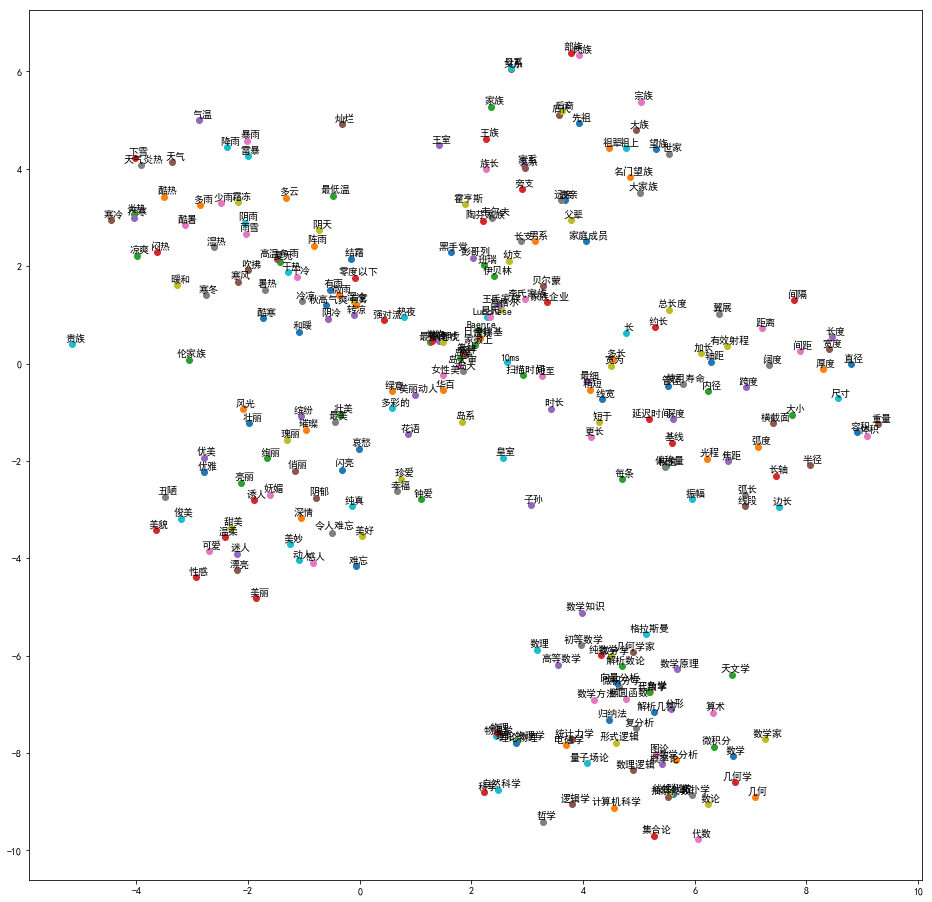

In [15]:
tsne_plot(model)